## Pratical Questions

1. Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

In [1]:
from scipy.stats import norm

def z_test(sample_mean, population_mean, population_std, sample_size, significance_level=0.05):
    # Calculate the Z-score
    z_score = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

    # Calculate the p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Output the results
    print(f"Z-Score: {z_score}")
    print(f"P-Value: {p_value}")

    # Interpretation
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.")
    else:
        print("Result: Fail to reject the null hypothesis. There is insufficient evidence to support the alternative hypothesis.")

# Example usage
sample_mean = 75
population_mean = 70
population_std = 10
sample_size = 30
significance_level = 0.05

z_test(sample_mean, population_mean, population_std, sample_size, significance_level)


Z-Score: 2.7386127875258306
P-Value: 0.0061698993205441255
Result: Reject the null hypothesis. There is sufficient evidence to support the alternative hypothesis.


2. Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.


In [2]:
import numpy as np
from scipy.stats import ttest_1samp

# Step 1: Simulate random data
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=65, scale=10, size=30)  # Generate 30 random data points

# Step 2: Set the population mean (null hypothesis)
population_mean = 70

# Step 3: Perform a one-sample t-test
t_stat, p_value = ttest_1samp(sample_data, population_mean)

# Step 4: Output the results
print(f"Sample Data: {sample_data}")
print(f"T-Statistic: {t_stat:.2f}")
print(f"P-Value: {p_value:.4f}")

# Step 5: Interpretation
significance_level = 0.05
if p_value < significance_level:
    print("Result: Reject the null hypothesis. There is sufficient evidence to suggest the sample mean is different from the population mean.")
else:
    print("Result: Fail to reject the null hypothesis. There is insufficient evidence to suggest the sample mean is different from the population mean.")


Sample Data: [69.96714153 63.61735699 71.47688538 80.23029856 62.65846625 62.65863043
 80.79212816 72.67434729 60.30525614 70.42560044 60.36582307 60.34270246
 67.41962272 45.86719755 47.75082167 59.37712471 54.8716888  68.14247333
 55.91975924 50.87696299 79.65648769 62.742237   65.67528205 50.75251814
 59.55617275 66.1092259  53.49006423 68.75698018 58.9936131  62.0830625 ]
T-Statistic: -4.19
P-Value: 0.0002
Result: Reject the null hypothesis. There is sufficient evidence to suggest the sample mean is different from the population mean.


3. Implement a one-sample Z-test using Python to compare the sample mean with the population mean.


In [3]:
from scipy.stats import norm

def one_sample_z_test(sample_data, population_mean, population_std, significance_level=0.05):
    # Step 1: Calculate the sample mean and sample size
    sample_mean = sum(sample_data) / len(sample_data)
    sample_size = len(sample_data)

    # Step 2: Calculate the Z-score
    z_score = (sample_mean - population_mean) / (population_std / (sample_size**0.5))

    # Step 3: Calculate the p-value (two-tailed test)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Step 4: Output the results
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Z-Score: {z_score:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Step 5: Interpret the results
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no significant difference between the sample mean and the population mean.")

# Example usage
sample_data = [72, 75, 78, 80, 76, 73, 79, 77, 74, 72]  # Example data points
population_mean = 70
population_std = 5
significance_level = 0.05

one_sample_z_test(sample_data, population_mean, population_std, significance_level)


Sample Mean: 75.60
Z-Score: 3.54
P-Value: 0.0004
Result: Reject the null hypothesis. The sample mean is significantly different from the population mean.


4.  Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

Z-Score: 1.64
P-Value: 0.1003
Result: Fail to reject the null hypothesis.


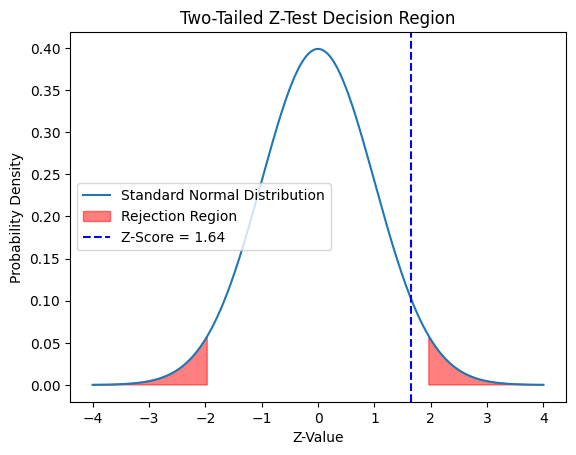

In [4]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Function for a two-tailed Z-test
def two_tailed_z_test(sample_mean, population_mean, population_std, sample_size, significance_level=0.05):
    # Step 1: Calculate Z-score
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Step 2: Calculate p-value (two-tailed)
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    # Output results
    print(f"Z-Score: {z_score:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Step 3: Decision
    critical_value = norm.ppf(1 - significance_level / 2)
    if abs(z_score) > critical_value:
        print("Result: Reject the null hypothesis.")
    else:
        print("Result: Fail to reject the null hypothesis.")

    # Visualization
    x = np.linspace(-4, 4, 1000)  # Z-distribution values
    y = norm.pdf(x)  # Probability density function
    plt.plot(x, y, label="Standard Normal Distribution")

    # Highlight critical regions
    critical_x = [-critical_value, critical_value]
    plt.fill_between(x, 0, y, where=(x < critical_x[0]) | (x > critical_x[1]), color="red", alpha=0.5, label="Rejection Region")
    plt.axvline(z_score, color="blue", linestyle="--", label=f"Z-Score = {z_score:.2f}")

    plt.title("Two-Tailed Z-Test Decision Region")
    plt.xlabel("Z-Value")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.show()

# Example usage
sample_mean = 78
population_mean = 75
population_std = 10
sample_size = 30
significance_level = 0.05

two_tailed_z_test(sample_mean, population_mean, population_std, sample_size, significance_level)


5. Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

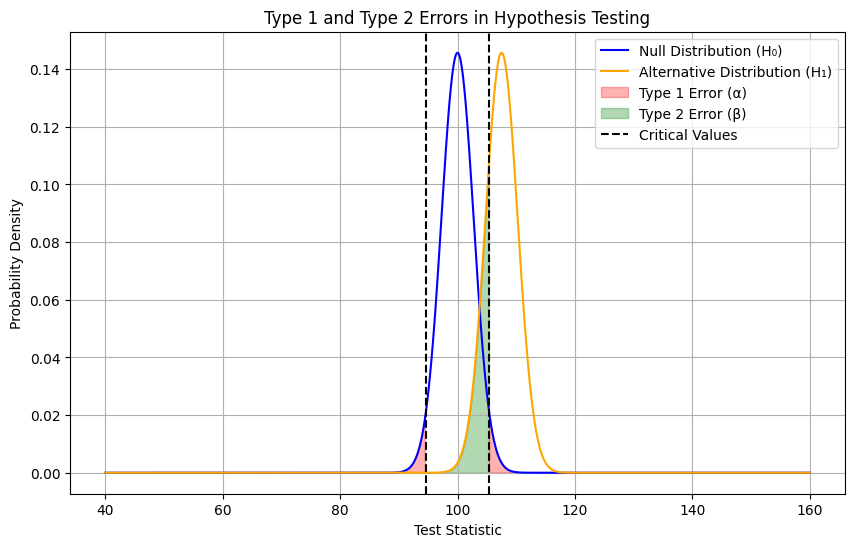

Type 1 Error (α): 0.0500
Type 2 Error (β): 0.2181
Power (1 - β): 0.7819


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def visualize_errors(sample_size, population_mean, population_std, significance_level, effect_size):
    # Step 1: Calculate critical values for the null hypothesis
    z_critical = norm.ppf(1 - significance_level / 2)  # Two-tailed critical value
    margin_of_error = z_critical * (population_std / np.sqrt(sample_size))
    critical_values = [population_mean - margin_of_error, population_mean + margin_of_error]

    # Step 2: Alternative hypothesis (shifted mean)
    alternative_mean = population_mean + effect_size * population_std

    # Step 3: Plot the distributions
    x = np.linspace(population_mean - 4 * population_std, population_mean + 4 * population_std, 1000)
    null_distribution = norm.pdf(x, population_mean, population_std / np.sqrt(sample_size))
    alt_distribution = norm.pdf(x, alternative_mean, population_std / np.sqrt(sample_size))

    plt.figure(figsize=(10, 6))
    plt.plot(x, null_distribution, label="Null Distribution (H₀)", color="blue")
    plt.plot(x, alt_distribution, label="Alternative Distribution (H₁)", color="orange")

    # Step 4: Highlight Type 1 Error regions
    plt.fill_between(x, 0, null_distribution,
                     where=(x < critical_values[0]) | (x > critical_values[1]),
                     color="red", alpha=0.3, label="Type 1 Error (α)")

    # Step 5: Highlight Type 2 Error region
    plt.fill_between(x, 0, alt_distribution,
                     where=(x > critical_values[0]) & (x < critical_values[1]),
                     color="green", alpha=0.3, label="Type 2 Error (β)")

    # Step 6: Add labels, legend, and titles
    plt.axvline(critical_values[0], color="black", linestyle="--", label="Critical Values")
    plt.axvline(critical_values[1], color="black", linestyle="--")
    plt.title("Type 1 and Type 2 Errors in Hypothesis Testing")
    plt.xlabel("Test Statistic")
    plt.ylabel("Probability Density")
    plt.legend()
    plt.grid()
    plt.show()

    # Step 7: Calculate and display probabilities for errors
    type_1_error = significance_level
    type_2_error = norm.cdf(critical_values[1], alternative_mean, population_std / np.sqrt(sample_size)) - \
                   norm.cdf(critical_values[0], alternative_mean, population_std / np.sqrt(sample_size))
    print(f"Type 1 Error (α): {type_1_error:.4f}")
    print(f"Type 2 Error (β): {type_2_error:.4f}")
    print(f"Power (1 - β): {1 - type_2_error:.4f}")

# Example usage
sample_size = 30
population_mean = 100
population_std = 15
significance_level = 0.05
effect_size = 0.5  # Difference in means (in terms of standard deviation units)

visualize_errors(sample_size, population_mean, population_std, significance_level, effect_size)


6. Write a Python program to perform an independent T-test and interpret the results.

In [6]:
from scipy.stats import ttest_ind
import numpy as np

def independent_t_test(group1, group2, significance_level=0.05):
    # Perform an independent t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Assume unequal variances (Welch's t-test)

    # Output the results
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpret the results
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. There is a significant difference between the two groups.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no significant difference between the two groups.")

# Example usage: Simulated data for two groups
np.random.seed(42)  # For reproducibility
group1 = np.random.normal(loc=65, scale=10, size=30)  # Group 1 with mean=65, std=10
group2 = np.random.normal(loc=70, scale=10, size=30)  # Group 2 with mean=70, std=10

# Perform the t-test
independent_t_test(group1, group2)


T-Statistic: -2.40
P-Value: 0.0197
Result: Reject the null hypothesis. There is a significant difference between the two groups.


7. Perform a paired sample T-test using Python and visualize the comparison results.

T-Statistic: -0.62
P-Value: 0.5432
Result: Fail to reject the null hypothesis. There is no significant difference between the paired samples.


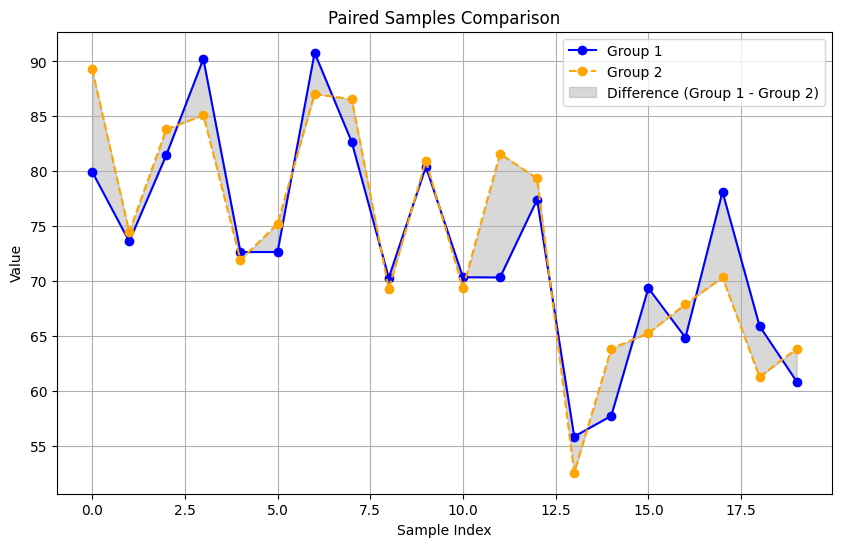

In [7]:
import numpy as np
from scipy.stats import ttest_rel
import matplotlib.pyplot as plt

def paired_t_test(group1, group2, significance_level=0.05):
    # Perform a paired t-test
    t_stat, p_value = ttest_rel(group1, group2)

    # Output the results
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. There is a significant difference between the paired samples.")
    else:
        print("Result: Fail to reject the null hypothesis. There is no significant difference between the paired samples.")

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(group1, label="Group 1", marker='o', linestyle='-', color='blue')
    plt.plot(group2, label="Group 2", marker='o', linestyle='--', color='orange')
    plt.fill_between(range(len(group1)), group1, group2, color='gray', alpha=0.3, label='Difference (Group 1 - Group 2)')
    plt.title("Paired Samples Comparison")
    plt.xlabel("Sample Index")
    plt.ylabel("Value")
    plt.legend()
    plt.grid()
    plt.show()

# Example usage: Simulated paired data
np.random.seed(42)  # For reproducibility
group1 = np.random.normal(loc=75, scale=10, size=20)  # Group 1
group2 = group1 + np.random.normal(loc=2, scale=5, size=20)  # Group 2 with slight shift

paired_t_test(group1, group2)


8. Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [8]:
import numpy as np
from scipy.stats import ttest_1samp, norm

def z_test(sample_mean, population_mean, population_std, sample_size):
    # Calculate the Z-score
    z_score = (sample_mean - population_mean) / (population_std / np.sqrt(sample_size))

    # Calculate the two-tailed p-value
    p_value = 2 * (1 - norm.cdf(abs(z_score)))

    return z_score, p_value

def compare_z_test_t_test():
    # Simulate data
    np.random.seed(42)  # For reproducibility
    population_mean = 100
    population_std = 15
    sample_size = 30
    sample_data = np.random.normal(loc=population_mean, scale=population_std, size=sample_size)

    # Perform Z-test
    sample_mean = np.mean(sample_data)
    z_score, z_p_value = z_test(sample_mean, population_mean, population_std, sample_size)

    # Perform T-test
    t_stat, t_p_value = ttest_1samp(sample_data, population_mean)

    # Print results
    print("Z-Test Results:")
    print(f"Sample Mean: {sample_mean:.2f}")
    print(f"Z-Score: {z_score:.2f}")
    print(f"P-Value: {z_p_value:.4f}")

    print("\nT-Test Results:")
    print(f"T-Statistic: {t_stat:.2f}")
    print(f"P-Value: {t_p_value:.4f}")

    # Compare results
    print("\nComparison:")
    if z_p_value < 0.05:
        print("Z-Test: Reject the null hypothesis.")
    else:
        print("Z-Test: Fail to reject the null hypothesis.")

    if t_p_value < 0.05:
        print("T-Test: Reject the null hypothesis.")
    else:
        print("T-Test: Fail to reject the null hypothesis.")

# Run the comparison
compare_z_test_t_test()


Z-Test Results:
Sample Mean: 97.18
Z-Score: -1.03
P-Value: 0.3028

T-Test Results:
T-Statistic: -1.15
P-Value: 0.2616

Comparison:
Z-Test: Fail to reject the null hypothesis.
T-Test: Fail to reject the null hypothesis.


9. Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [9]:
from scipy.stats import norm
import numpy as np

def confidence_interval(sample_data, confidence_level=0.95):
    # Step 1: Calculate sample mean and standard error
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)  # Use sample standard deviation
    sample_size = len(sample_data)
    standard_error = sample_std / np.sqrt(sample_size)

    # Step 2: Calculate Z-score for the given confidence level
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)

    # Step 3: Calculate the margin of error
    margin_of_error = z_score * standard_error

    # Step 4: Compute confidence interval
    lower_bound = sample_mean - margin_of_error
    upper_bound = sample_mean + margin_of_error

    return lower_bound, upper_bound

# Example usage
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=100, scale=15, size=30)  # Simulated sample data
confidence_level = 0.95
lower, upper = confidence_interval(sample_data, confidence_level)

print(f"Sample Mean: {np.mean(sample_data):.2f}")
print(f"{confidence_level*100:.0f}% Confidence Interval: ({lower:.2f}, {upper:.2f})")


Sample Mean: 97.18
95% Confidence Interval: (92.35, 102.01)


10. Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [10]:
from scipy.stats import norm
import numpy as np

def calculate_margin_of_error(sample_data, confidence_level=0.95):
    # Step 1: Calculate sample statistics
    sample_mean = np.mean(sample_data)
    sample_std = np.std(sample_data, ddof=1)  # Use sample standard deviation
    sample_size = len(sample_data)
    standard_error = sample_std / np.sqrt(sample_size)

    # Step 2: Determine the Z-score for the given confidence level
    z_score = norm.ppf(1 - (1 - confidence_level) / 2)

    # Step 3: Calculate the margin of error
    margin_of_error = z_score * standard_error

    # Step 4: Output results
    return margin_of_error

# Example usage
np.random.seed(42)  # For reproducibility
sample_data = np.random.normal(loc=75, scale=10, size=30)  # Simulated sample data
confidence_level = 0.95

margin_of_error = calculate_margin_of_error(sample_data, confidence_level)
print(f"Sample Mean: {np.mean(sample_data):.2f}")
print(f"Confidence Level: {confidence_level*100:.0f}%")
print(f"Margin of Error: {margin_of_error:.2f}")


Sample Mean: 73.12
Confidence Level: 95%
Margin of Error: 3.22


11. Implement a Bayesian inference method using Bayes' Theorem in Python and explain the process.

In [15]:
def bayes_theorem(prior_D, likelihood_T_given_D, false_positive):
    # Total probability of a positive test (P(T))
    marginal_T = (likelihood_T_given_D * prior_D) + (false_positive * (1 - prior_D))

    # Posterior probability: P(D | T)
    posterior_D_given_T = (likelihood_T_given_D * prior_D) / marginal_T

    return posterior_D_given_T

# Given probabilities
prior_D = 0.01  # P(D): Prior probability of having the disease
likelihood_T_given_D = 0.95  # P(T | D): Test sensitivity
false_positive = 0.05  # P(T | ¬D): False positive rate

# Compute posterior probability
posterior_probability = bayes_theorem(prior_D, likelihood_T_given_D, false_positive)

# Display result
print(f"Probability of having the disease given a positive test result: {posterior_probability:.4f}")


Probability of having the disease given a positive test result: 0.1610


12. Perform a Chi-square test for independence between two categorical variables in Python.

In [16]:
import numpy as np
from scipy.stats import chi2_contingency

def chi_square_test(data):
    """
    Perform a Chi-square test for independence.

    Args:
        data (2D array-like): Contingency table of observed frequencies.

    Returns:
        chi2_stat (float): Chi-square test statistic.
        p_value (float): P-value of the test.
        dof (int): Degrees of freedom.
        expected (array): Expected frequencies table.
    """
    chi2_stat, p_value, dof, expected = chi2_contingency(data)
    print("Chi-square Test Results:")
    print(f"Chi-square Statistic: {chi2_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("Expected Frequencies:")
    print(expected)

    # Interpretation
    significance_level = 0.05
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. The variables are likely associated.")
    else:
        print("Result: Fail to reject the null hypothesis. The variables are likely independent.")

# Example Usage
# Create a contingency table (e.g., rows = Gender, columns = Preference)
data = np.array([[30, 10],  # Row 1: Male
                 [20, 40]]) # Row 2: Female

chi_square_test(data)


Chi-square Test Results:
Chi-square Statistic: 15.04
P-Value: 0.0001
Degrees of Freedom: 1
Expected Frequencies:
[[20. 20.]
 [30. 30.]]
Result: Reject the null hypothesis. The variables are likely associated.


13.  Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.

In [17]:
import numpy as np

def calculate_expected_frequencies(observed):
    """
    Calculate the expected frequencies for a Chi-square test.

    Args:
        observed (2D array-like): Contingency table of observed frequencies.

    Returns:
        expected (array): Table of expected frequencies.
    """
    # Convert observed data to a NumPy array for calculations
    observed = np.array(observed)

    # Calculate row totals and column totals
    row_totals = observed.sum(axis=1)
    col_totals = observed.sum(axis=0)
    total = observed.sum()

    # Calculate the expected frequencies
    expected = np.outer(row_totals, col_totals) / total

    return expected

# Example usage
# Contingency table of observed frequencies (e.g., rows = Gender, columns = Preference)
observed = [
    [30, 10],  # Row 1 (e.g., Male)
    [20, 40]   # Row 2 (e.g., Female)
]

expected_frequencies = calculate_expected_frequencies(observed)
print("Observed Frequencies:")
print(np.array(observed))
print("\nExpected Frequencies:")
print(expected_frequencies)


Observed Frequencies:
[[30 10]
 [20 40]]

Expected Frequencies:
[[20. 20.]
 [30. 30.]]


14.  Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [18]:
from scipy.stats import chisquare

def goodness_of_fit_test(observed, expected):
    """
    Perform a Chi-square goodness-of-fit test.

    Args:
        observed (list or array): Observed frequencies.
        expected (list or array): Expected frequencies.

    Returns:
        chi2_stat (float): Chi-square test statistic.
        p_value (float): P-value of the test.
    """
    # Perform the Chi-square goodness-of-fit test
    chi2_stat, p_value = chisquare(f_obs=observed, f_exp=expected)

    # Output the results
    print("Goodness-of-Fit Test Results:")
    print(f"Chi-square Statistic: {chi2_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpret the results
    significance_level = 0.05
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. The observed data does not fit the expected distribution.")
    else:
        print("Result: Fail to reject the null hypothesis. The observed data fits the expected distribution.")

# Example usage
# Observed frequencies (e.g., outcomes from a die roll)
observed = [18, 22, 20, 17, 19, 24]

# Expected frequencies (e.g., uniform distribution for a fair die)
expected = [20, 20, 20, 20, 20, 20]

goodness_of_fit_test(observed, expected)


Goodness-of-Fit Test Results:
Chi-square Statistic: 1.70
P-Value: 0.8889
Result: Fail to reject the null hypothesis. The observed data fits the expected distribution.


15. Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

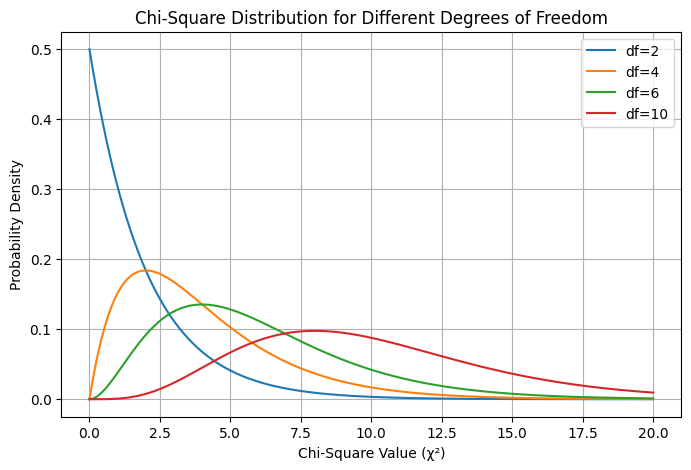

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate Chi-square distributed values
df_values = [2, 4, 6, 10]  # Different degrees of freedom
x = np.linspace(0, 20, 500)  # Range for visualization

# Plot Chi-square distributions
plt.figure(figsize=(8, 5))
for df in df_values:
    y = stats.chi2.pdf(x, df)  # Probability Density Function (PDF)
    plt.plot(x, y, label=f'df={df}')

# Formatting the plot
plt.title("Chi-Square Distribution for Different Degrees of Freedom")
plt.xlabel("Chi-Square Value (χ²)")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()


16. Implement an F-test using Python to compare the variances of two random samples.

In [20]:
import numpy as np
import scipy.stats as stats

# Generate two random samples
np.random.seed(42)  # For reproducibility
sample1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, Size=30
sample2 = np.random.normal(loc=50, scale=15, size=30)  # Mean=50, Std=15, Size=30

# Compute variances
var1 = np.var(sample1, ddof=1)  # Sample variance (unbiased)
var2 = np.var(sample2, ddof=1)

# Compute F-statistic
F_stat = var1 / var2  # Larger variance divided by smaller one
df1 = len(sample1) - 1  # Degrees of freedom for sample1
df2 = len(sample2) - 1  # Degrees of freedom for sample2

# Compute p-value (two-tailed test)
p_value = 2 * min(stats.f.cdf(F_stat, df1, df2), 1 - stats.f.cdf(F_stat, df1, df2))

# Print results
print(f"Sample 1 Variance: {var1:.4f}")
print(f"Sample 2 Variance: {var2:.4f}")
print(f"F-Statistic: {F_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpretation
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject H0: Variances are significantly different.")
else:
    print("Fail to reject H0: No significant difference in variances.")


Sample 1 Variance: 81.0012
Sample 2 Variance: 195.0640
F-Statistic: 0.4153
P-Value: 0.0209
Reject H0: Variances are significantly different.


17. Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

In [21]:
from scipy.stats import f_oneway

def anova_test(*groups):
    """
    Perform a one-way ANOVA test to compare means between multiple groups.

    Args:
        groups: Variable-length arguments, each representing a group of observations.

    Returns:
        None (prints the ANOVA test results and interpretation).
    """
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(*groups)

    # Output the results
    print("ANOVA Test Results:")
    print(f"F-Statistic: {f_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpret the results
    significance_level = 0.05
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. At least one group mean is significantly different from the others.")
    else:
        print("Result: Fail to reject the null hypothesis. The group means are not significantly different.")

# Example usage: Simulated data for three groups
group1 = [23, 25, 27, 22, 24, 26]
group2 = [30, 32, 35, 31, 33, 34]
group3 = [19, 18, 21, 20, 22, 23]

anova_test(group1, group2, group3)


ANOVA Test Results:
F-Statistic: 64.00
P-Value: 0.0000
Result: Reject the null hypothesis. At least one group mean is significantly different from the others.


18. D Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

ANOVA Test Results:
F-Statistic: 5.15
P-Value: 0.0088
Result: Reject the null hypothesis. At least one group mean is significantly different.


<ipython-input-22-72132a6af7c6>:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=[f"Group {i+1}" for i in range(len(groups))])


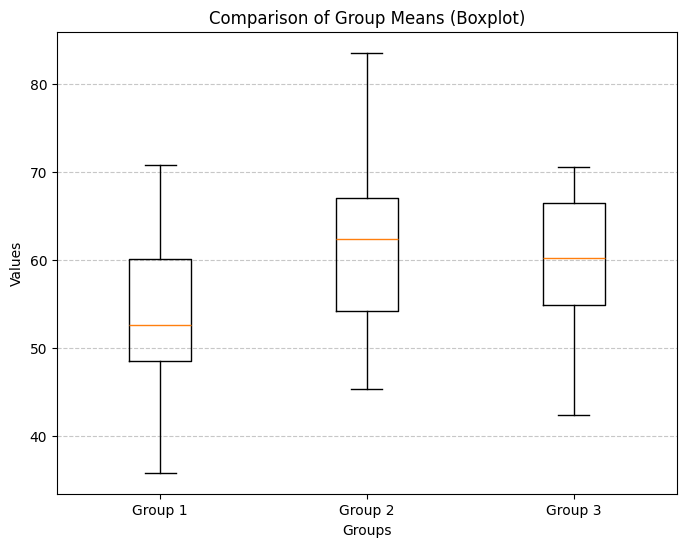

In [22]:
import numpy as np
from scipy.stats import f_oneway
import matplotlib.pyplot as plt

def one_way_anova_with_plot(*groups):
    """
    Perform a one-way ANOVA test and plot the group comparisons.

    Args:
        groups: Variable-length arguments, each representing a group of observations.

    Returns:
        None (prints ANOVA results and displays a boxplot).
    """
    # Perform one-way ANOVA
    f_stat, p_value = f_oneway(*groups)

    # Output the results
    print("ANOVA Test Results:")
    print(f"F-Statistic: {f_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    significance_level = 0.05
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. At least one group mean is significantly different.")
    else:
        print("Result: Fail to reject the null hypothesis. The group means are not significantly different.")

    # Visualization
    plt.figure(figsize=(8, 6))
    plt.boxplot(groups, labels=[f"Group {i+1}" for i in range(len(groups))])
    plt.title("Comparison of Group Means (Boxplot)")
    plt.ylabel("Values")
    plt.xlabel("Groups")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Example usage: Simulated data for three groups
np.random.seed(42)
group1 = np.random.normal(loc=55, scale=10, size=20)  # Group 1
group2 = np.random.normal(loc=65, scale=10, size=20)  # Group 2
group3 = np.random.normal(loc=60, scale=10, size=20)  # Group 3

one_way_anova_with_plot(group1, group2, group3)


19. Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.

In [23]:
import numpy as np
from scipy.stats import shapiro, levene
from statsmodels.stats.stattools import durbin_watson

def check_anova_assumptions(*groups):
    """
    Check the assumptions for ANOVA: normality, independence, and equal variance.

    Args:
        groups: Variable-length arguments, each representing a group of observations.

    Returns:
        None (prints test results and interpretation).
    """
    # Combine all groups for independence check
    combined_data = np.concatenate(groups)

    # 1. Check Normality (Shapiro-Wilk Test for each group)
    print("Normality Check (Shapiro-Wilk Test):")
    for i, group in enumerate(groups):
        stat, p_value = shapiro(group)
        print(f"Group {i+1} - p-value: {p_value:.4f}")
        if p_value < 0.05:
            print(f"  Group {i+1}: Data is not normally distributed.")
        else:
            print(f"  Group {i+1}: Data is normally distributed.")
    print()

    # 2. Check Equal Variance (Levene's Test)
    print("Equal Variance Check (Levene's Test):")
    stat, p_value = levene(*groups)
    print(f"Levene's Test - p-value: {p_value:.4f}")
    if p_value < 0.05:
        print("  Variances are not equal (assumption violated).")
    else:
        print("  Variances are equal (assumption met).")
    print()

    # 3. Check Independence (Durbin-Watson Test)
    print("Independence Check (Durbin-Watson Test):")
    dw_stat = durbin_watson(combined_data)
    print(f"Durbin-Watson Statistic: {dw_stat:.4f}")
    if dw_stat < 1.5 or dw_stat > 2.5:
        print("  Warning: Possible lack of independence in the data.")
    else:
        print("  Data is likely independent.")
    print()

# Example Usage
group1 = [23, 25, 27, 22, 24, 26]  # Example Group 1
group2 = [30, 32, 35, 31, 33, 34]  # Example Group 2
group3 = [19, 18, 21, 20, 22, 23]  # Example Group 3

check_anova_assumptions(group1, group2, group3)


Normality Check (Shapiro-Wilk Test):
Group 1 - p-value: 0.9606
  Group 1: Data is normally distributed.
Group 2 - p-value: 0.9606
  Group 2: Data is normally distributed.
Group 3 - p-value: 0.9606
  Group 3: Data is normally distributed.

Equal Variance Check (Levene's Test):
Levene's Test - p-value: 1.0000
  Variances are equal (assumption met).

Independence Check (Durbin-Watson Test):
Durbin-Watson Statistic: 0.0265



20.  Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.

Dataset Head:
  Factor1 Factor2   Response
0       A       X  57.483571
1       A       X  54.308678
2       A       X  58.238443
3       A       X  62.615149
4       A       X  53.829233

ANOVA Results:
                   df       sum_sq     mean_sq          F    PR(>F)
Factor1           1.0   326.444273  326.444273  15.636905  0.000218
Factor2           1.0   411.254425  411.254425  19.699370  0.000043
Factor1:Factor2   1.0    45.876271   45.876271   2.197505  0.143840
Residual         56.0  1169.085516   20.876527        NaN       NaN


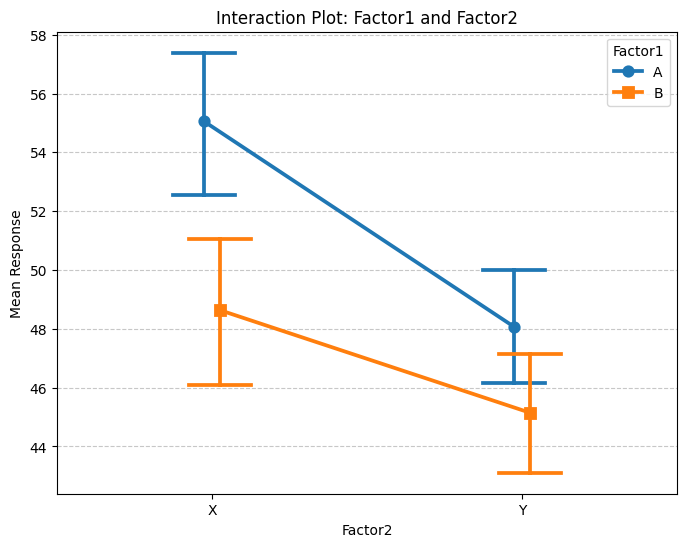

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

def two_way_anova_and_visualize():
    # Step 1: Simulate the dataset
    np.random.seed(42)
    data = pd.DataFrame({
        'Factor1': np.repeat(['A', 'B'], 30),  # Two levels of Factor1
        'Factor2': np.tile(np.repeat(['X', 'Y'], 15), 2),  # Two levels of Factor2
        'Response': np.random.normal(50, 5, 60)  # Simulated response variable
    })

    # Introduce interaction effect
    data.loc[(data['Factor1'] == 'A') & (data['Factor2'] == 'X'), 'Response'] += 5
    data.loc[(data['Factor1'] == 'B') & (data['Factor2'] == 'Y'), 'Response'] -= 5

    print("Dataset Head:")
    print(data.head())

    # Step 2: Perform two-way ANOVA
    model = ols('Response ~ Factor1 * Factor2', data=data).fit()
    anova_results = anova_lm(model)
    print("\nANOVA Results:")
    print(anova_results)

    # Step 3: Visualization - Interaction Plot
    plt.figure(figsize=(8, 6))
    sns.pointplot(data=data, x='Factor2', y='Response', hue='Factor1', markers=["o", "s"], capsize=.2, dodge=True)
    plt.title("Interaction Plot: Factor1 and Factor2")
    plt.ylabel("Mean Response")
    plt.xlabel("Factor2")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title="Factor1")
    plt.show()

# Run the function
two_way_anova_and_visualize()


21.  Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

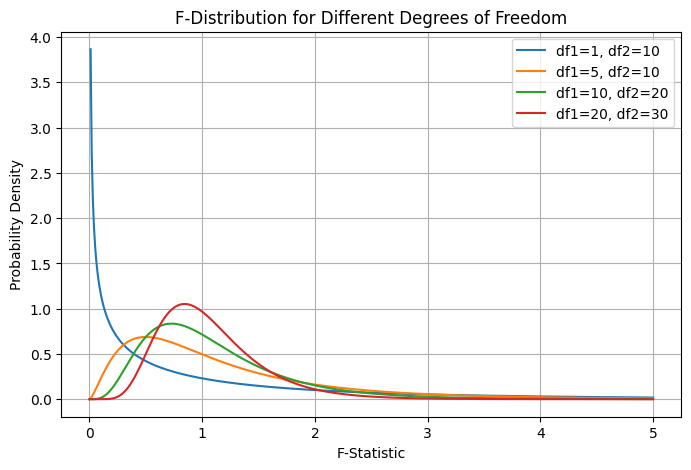

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Define degrees of freedom for different F-distributions
df_pairs = [(1, 10), (5, 10), (10, 20), (20, 30)]
x = np.linspace(0, 5, 500)  # Range for x-axis

# Plot F-distributions for different (df1, df2) pairs
plt.figure(figsize=(8, 5))
for df1, df2 in df_pairs:
    y = stats.f.pdf(x, df1, df2)  # Probability Density Function (PDF)
    plt.plot(x, y, label=f'df1={df1}, df2={df2}')

# Formatting the plot
plt.title("F-Distribution for Different Degrees of Freedom")
plt.xlabel("F-Statistic")
plt.ylabel("Probability Density")
plt.legend()
plt.grid()
plt.show()


22. Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

F-Statistic: 40.9756
P-Value: 0.0000
Reject H0: At least one group mean is significantly different.


<ipython-input-26-a094cc38d02f>:27: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])


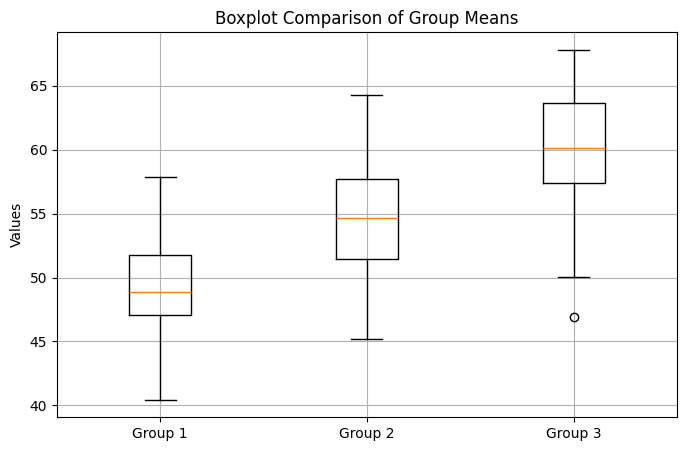

In [26]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Generate random data for three groups (simulating different conditions)
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=5, size=30)  # Mean=50, Std=5
group2 = np.random.normal(loc=55, scale=5, size=30)  # Mean=55, Std=5
group3 = np.random.normal(loc=60, scale=5, size=30)  # Mean=60, Std=5

# Perform One-Way ANOVA
F_stat, p_value = stats.f_oneway(group1, group2, group3)

# Print results
print(f"F-Statistic: {F_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H0: At least one group mean is significantly different.")
else:
    print("Fail to reject H0: No significant difference among group means.")

# Boxplot Visualization
plt.figure(figsize=(8, 5))
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'])
plt.title("Boxplot Comparison of Group Means")
plt.ylabel("Values")
plt.grid()
plt.show()


23. Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

T-Statistic: -1.5522
P-Value: 0.1261
Fail to reject H0: No significant difference between means.


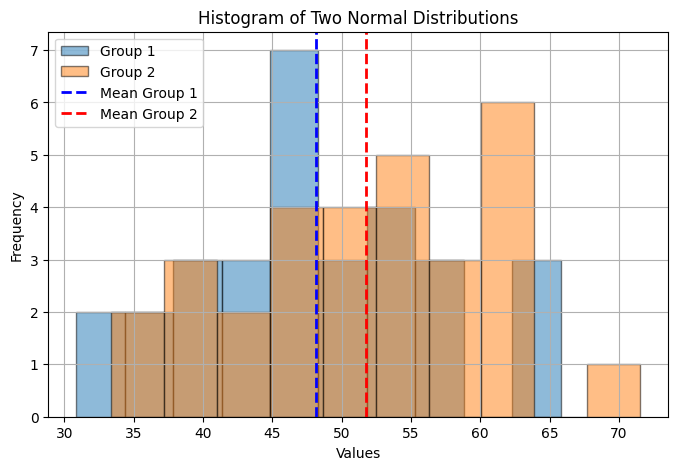

In [28]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Generate random normal data for two groups
np.random.seed(42)
group1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std=10, Size=30
group2 = np.random.normal(loc=53, scale=10, size=30)  # Mean=53, Std=10, Size=30

# Step 2: Perform an independent t-test (assumes equal variances)
t_stat, p_value = stats.ttest_ind(group1, group2)

# Step 3: Print results
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 4: Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The means are significantly different.")
else:
    print("Fail to reject H0: No significant difference between means.")

# Step 5: Visualize with histograms
plt.figure(figsize=(8, 5))
plt.hist(group1, alpha=0.5, label='Group 1', bins=10, edgecolor='black')
plt.hist(group2, alpha=0.5, label='Group 2', bins=10, edgecolor='black')
plt.axvline(np.mean(group1), color='blue', linestyle='dashed', linewidth=2, label='Mean Group 1')
plt.axvline(np.mean(group2), color='red', linestyle='dashed', linewidth=2, label='Mean Group 2')
plt.title("Histogram of Two Normal Distributions")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()



24. Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [29]:
from scipy.stats import chi2

def test_population_variance(sample_data, hypothesized_variance, significance_level=0.05):
    """
    Perform a hypothesis test for population variance using the Chi-square distribution.

    Args:
        sample_data (list or array): Sample data.
        hypothesized_variance (float): The hypothesized population variance (H0).
        significance_level (float): The significance level (alpha, default is 0.05).

    Returns:
        None (prints test results and interpretation).
    """
    # Step 1: Calculate sample size, sample variance, and test statistic
    sample_size = len(sample_data)
    sample_variance = sum((x - sum(sample_data)/sample_size)**2 for x in sample_data) / (sample_size - 1)
    chi_square_stat = (sample_size - 1) * sample_variance / hypothesized_variance

    # Step 2: Find critical values (two-tailed test)
    chi2_lower = chi2.ppf(significance_level / 2, df=sample_size - 1)
    chi2_upper = chi2.ppf(1 - significance_level / 2, df=sample_size - 1)

    # Step 3: Interpret results
    print("Hypothesis Test for Population Variance:")
    print(f"Sample Variance: {sample_variance:.4f}")
    print(f"Chi-Square Statistic: {chi_square_stat:.4f}")
    print(f"Chi-Square Critical Values: ({chi2_lower:.4f}, {chi2_upper:.4f})")

    if chi_square_stat < chi2_lower or chi_square_stat > chi2_upper:
        print("Result: Reject the null hypothesis. The population variance is significantly different from the hypothesized variance.")
    else:
        print("Result: Fail to reject the null hypothesis. The population variance is not significantly different from the hypothesized variance.")

# Example Usage
sample_data = [56, 60, 62, 64, 65, 67, 68, 69, 70, 72]  # Example sample data
hypothesized_variance = 25  # Hypothesized population variance
significance_level = 0.05  # Significance level

test_population_variance(sample_data, hypothesized_variance, significance_level)


Hypothesis Test for Population Variance:
Sample Variance: 24.2333
Chi-Square Statistic: 8.7240
Chi-Square Critical Values: (2.7004, 19.0228)
Result: Fail to reject the null hypothesis. The population variance is not significantly different from the hypothesized variance.


25. Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [30]:
from statsmodels.stats.proportion import proportions_ztest

def z_test_for_proportions(successes, observations, significance_level=0.05):
    """
    Perform a two-proportion Z-test.

    Args:
        successes (list): List of successes for each group [success1, success2].
        observations (list): List of observations for each group [obs1, obs2].
        significance_level (float): The significance level (default is 0.05).

    Returns:
        None (prints the test results and interpretation).
    """
    # Perform the Z-test
    z_stat, p_value = proportions_ztest(count=successes, nobs=observations)

    # Output the results
    print("Z-Test for Proportions Results:")
    print(f"Z-Statistic: {z_stat:.2f}")
    print(f"P-Value: {p_value:.4f}")

    # Interpretation
    if p_value < significance_level:
        print("Result: Reject the null hypothesis. The proportions are significantly different.")
    else:
        print("Result: Fail to reject the null hypothesis. The proportions are not significantly different.")

# Example usage
# Group 1: 50 successes out of 200 observations
# Group 2: 60 successes out of 250 observations
successes = [50, 60]
observations = [200, 250]
z_test_for_proportions(successes, observations)


Z-Test for Proportions Results:
Z-Statistic: 0.25
P-Value: 0.8062
Result: Fail to reject the null hypothesis. The proportions are not significantly different.


26.  Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

Sample 1 Variance: 81.0012
Sample 2 Variance: 195.0640
F-Statistic: 2.4082
P-Value: 0.0209
Reject H0: Variances are significantly different.


<ipython-input-31-48c9f585ee9a>:36: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])


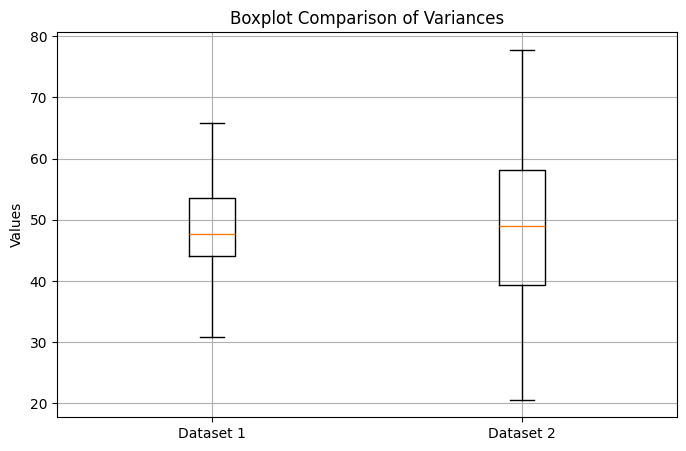

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Generate two random datasets with different variances
np.random.seed(42)
data1 = np.random.normal(loc=50, scale=10, size=30)  # Mean=50, Std Dev=10
data2 = np.random.normal(loc=50, scale=15, size=30)  # Mean=50, Std Dev=15

# Step 2: Compute sample variances
var1 = np.var(data1, ddof=1)  # Sample variance (unbiased)
var2 = np.var(data2, ddof=1)

# Step 3: Compute F-statistic
F_stat = var1 / var2 if var1 > var2 else var2 / var1  # Ensure F > 1
df1, df2 = len(data1) - 1, len(data2) - 1  # Degrees of freedom

# Step 4: Compute p-value (two-tailed test)
p_value = 2 * min(stats.f.cdf(F_stat, df1, df2), 1 - stats.f.cdf(F_stat, df1, df2))

# Step 5: Print results
print(f"Sample 1 Variance: {var1:.4f}")
print(f"Sample 2 Variance: {var2:.4f}")
print(f"F-Statistic: {F_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 6: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H0: Variances are significantly different.")
else:
    print("Fail to reject H0: No significant difference in variances.")

# Step 7: Visualization with boxplots
plt.figure(figsize=(8, 5))
plt.boxplot([data1, data2], labels=['Dataset 1', 'Dataset 2'])
plt.title("Boxplot Comparison of Variances")
plt.ylabel("Values")
plt.grid()
plt.show()


27. Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

Chi-Square Statistic: 12.5000
P-Value: 0.0140
Reject H0: The observed distribution significantly differs from expected.


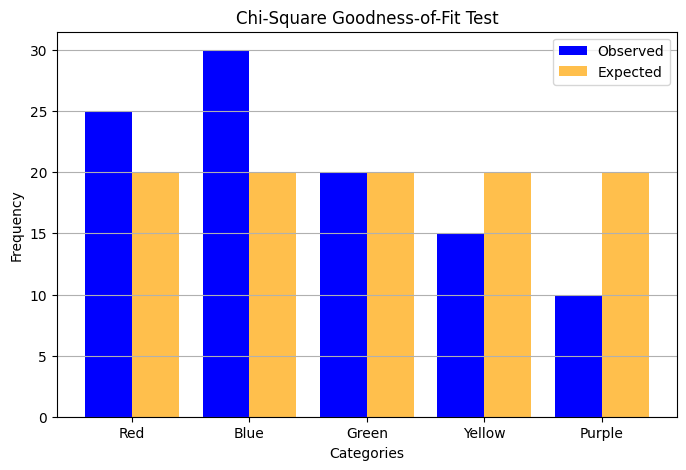

In [33]:
import numpy as np
from scipy.stats import chisquare

import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

# Step 1: Simulated observed data (e.g., colors chosen by 100 people)
observed = np.array([25, 30, 20, 15, 10])  # Red, Blue, Green, Yellow, Purple

# Step 2: Expected data assuming equal preference
total = np.sum(observed)
expected = np.full(len(observed), total / len(observed))  # Equal distribution

# Step 3: Perform Chi-square goodness-of-fit test
chi_stat, p_value = stats.chisquare(observed, expected)

# Step 4: Print results
print(f"Chi-Square Statistic: {chi_stat:.4f}")
print(f"P-Value: {p_value:.4f}")

# Step 5: Interpret results
alpha = 0.05
if p_value < alpha:
    print("Reject H0: The observed distribution significantly differs from expected.")
else:
    print("Fail to reject H0: No significant difference between observed and expected.")

# Step 6: Visualization (Bar chart)
categories = ['Red', 'Blue', 'Green', 'Yellow', 'Purple']
x = np.arange(len(categories))

plt.figure(figsize=(8, 5))
plt.bar(x - 0.2, observed, width=0.4, label="Observed", color='blue')
plt.bar(x + 0.2, expected, width=0.4, label="Expected", color='orange', alpha=0.7)
plt.xticks(x, categories)
plt.xlabel("Categories")
plt.ylabel("Frequency")
plt.title("Chi-Square Goodness-of-Fit Test")
plt.legend()
plt.grid(axis='y')
plt.show()

